In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [10]:
with open("/Users/michelle/Downloads/loss_log_noise.txt", "r") as f:
    logs = f.read().split("\n")
    logs1 = logs[1:388]
    logs2 = logs[389:-1]

In [3]:
data = {"iter": [], "D_A": [], "G_A": [], "cycle_A": [], "idt_A": [], "D_B": [], "G_B": [], "cycle_B": [], "idt_B": []}
epoch = 0
for item in logs1:
    number, log = item.split(") ")
    log = log.split(" ")
    new_epoch = int(number.split(" ")[1][:-1])
    if new_epoch > epoch:
        epoch_counter = data["iter"][-1] if data["iter"] else 0
        epoch = new_epoch
    data["iter"].append(epoch_counter + int(number.split(" ")[3][:-1]))
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))

In [4]:
prev_epoch = epoch

In [5]:
for item in logs2:
    number, log = item.split(") ")
    log = log.split(" ")
    new_epoch = int(number.split(" ")[1][:-1]) + prev_epoch
    if new_epoch > epoch:
        epoch_counter = data["iter"][-1] if data["iter"] else 0
        epoch = new_epoch
    data["iter"].append(epoch_counter + int(number.split(" ")[3][:-1]))
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))

In [5]:
def moving_average(a, n=100) :
    ret = np.cumsum(np.array(a), dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

Text(0.5, 1.0, 'Generator loss')

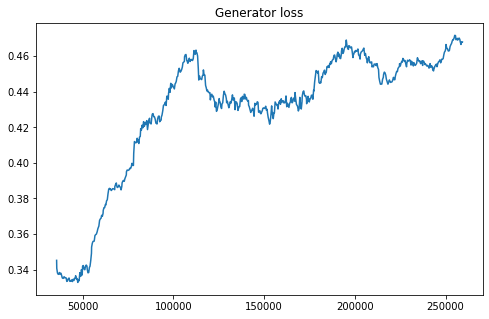

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(data["iter"][99:], moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

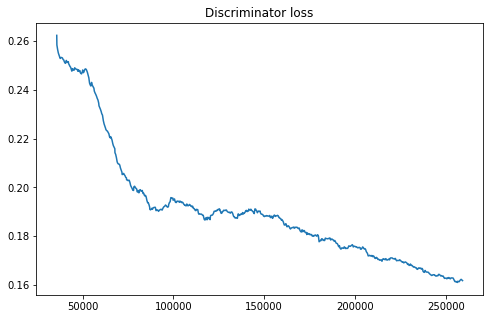

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(data["iter"][99:], moving_average(data["D_A"]))
plt.title("Discriminator loss")

# horse2zebra

In [191]:
with open("/Users/michelle/Downloads/loss_log_horse2zebra.txt", "r") as f:
    logs = f.read().split("\n")[2:-1]

In [192]:
logs.index("================ Training Loss (Sun Dec 13 20:13:17 2020) ================")

813

In [193]:
data = {"iter": [], "D_A": [], "G_A": [], "cycle_A": [], "idt_A": [], "D_B": [], "G_B": [], "cycle_B": [], "idt_B": []}
epoch = 0
for i, item in enumerate(logs[814:]):
    if "======" in item:
        print(i)
        break
    number, log = item.split(") ")
    log = log.split(" ")
    new_epoch = int(number.split(" ")[1][:-1])
    if new_epoch > epoch:
        epoch_counter = data["iter"][-1] if data["iter"] else 0
        epoch = new_epoch
    data["iter"].append(epoch_counter + int(number.split(" ")[3][:-1]))
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))

In [197]:
data["iter"].index(40320) / 4

29.0

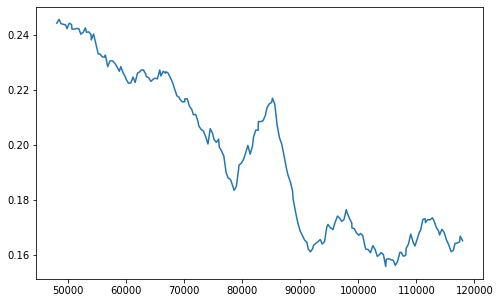

In [216]:
plt.figure(figsize=(8, 5))
plt.plot(data["iter"][120:][19:], moving_average(data["D_A"][120:], 20))

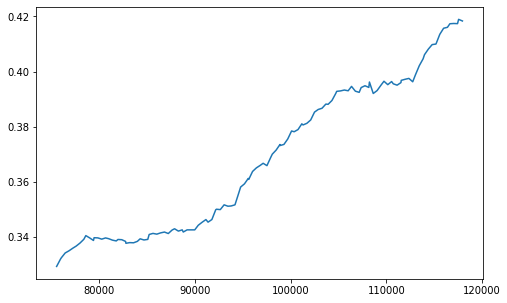

In [219]:
plt.figure(figsize=(8, 5))
plt.plot(data["iter"][120:][99:], moving_average(data["G_A"][120:], 100))

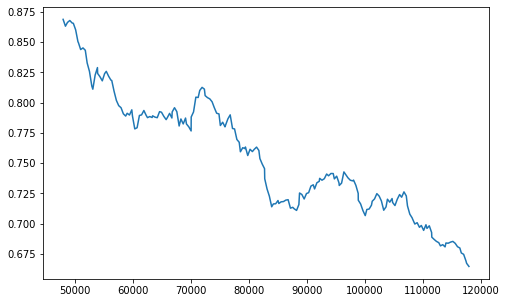

In [217]:
plt.figure(figsize=(8, 5))
plt.plot(data["iter"][120:][19:], moving_average(data["cycle_A"][120:], 20))

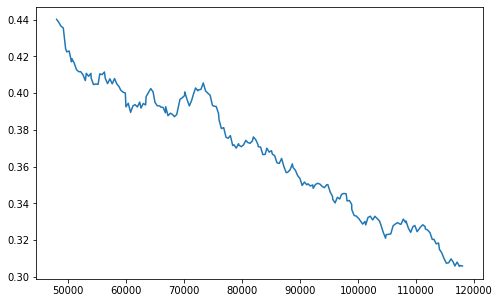

In [218]:
plt.figure(figsize=(8, 5))
plt.plot(data["iter"][120:][19:], moving_average(data["idt_A"][120:], 20))

# Noise

In [14]:
with open("/Users/michelle/Downloads/loss_log_noise.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]

In [27]:
iters = 1500

In [34]:
epoch = 1

In [38]:
logs

['(epoch: 1, iters: 400, time: 0.113, data: 0.275) D_A: 0.312 G_A: 0.387 cycle_A: 3.921 idt_A: 1.307 D_B: 0.282 G_B: 0.355 cycle_B: 2.826 idt_B: 1.900 ',
 '(epoch: 1, iters: 800, time: 0.107, data: 0.006) D_A: 0.205 G_A: 0.422 cycle_A: 2.922 idt_A: 1.137 D_B: 0.235 G_B: 0.339 cycle_B: 2.486 idt_B: 1.366 ',
 '(epoch: 1, iters: 1200, time: 0.102, data: 0.005) D_A: 0.256 G_A: 0.289 cycle_A: 2.845 idt_A: 1.052 D_B: 0.311 G_B: 0.446 cycle_B: 2.469 idt_B: 1.208 ',
 '(epoch: 2, iters: 96, time: 0.121, data: 0.006) D_A: 0.217 G_A: 0.346 cycle_A: 3.365 idt_A: 1.043 D_B: 0.237 G_B: 0.294 cycle_B: 2.290 idt_B: 1.512 ',
 '(epoch: 2, iters: 496, time: 0.122, data: 0.005) D_A: 0.227 G_A: 0.294 cycle_A: 2.631 idt_A: 1.075 D_B: 0.276 G_B: 0.279 cycle_B: 2.325 idt_B: 1.237 ',
 '(epoch: 2, iters: 896, time: 0.105, data: 0.006) D_A: 0.280 G_A: 0.235 cycle_A: 2.836 idt_A: 0.901 D_B: 0.207 G_B: 0.324 cycle_B: 2.003 idt_B: 1.255 ',
 '(epoch: 2, iters: 1296, time: 0.104, data: 0.006) D_A: 0.225 G_A: 0.323 cy

In [39]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs:
    number, log = item.split(") ")
    log = log.split(" ")
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    

Text(0.5, 1.0, 'Generator loss')

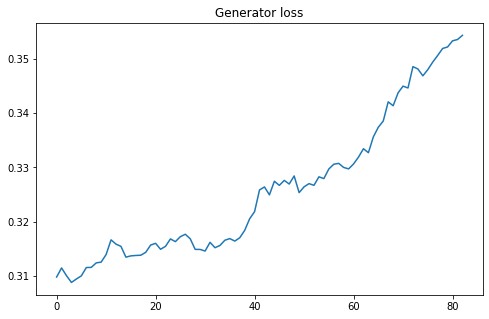

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'dloss')

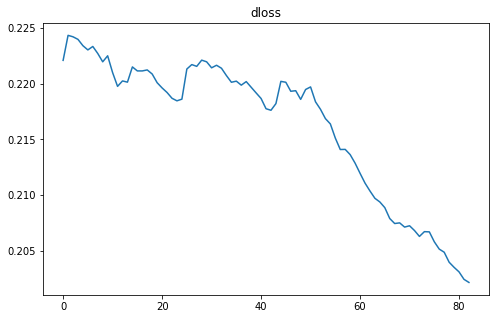

In [47]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("dloss")

# Without idt

In [51]:
with open("/Users/michelle/Downloads/loss_log_without_idt.txt", "r") as f:
    logs = f.read().split("\n")[6:-1]

In [52]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs:
    number, log = item.split(") ")
    log = log.split(" ")
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    


Text(0.5, 1.0, 'Generator loss')

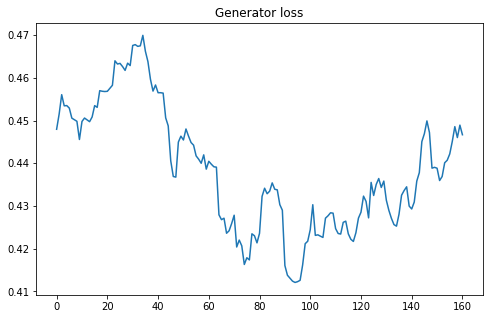

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'dloss')

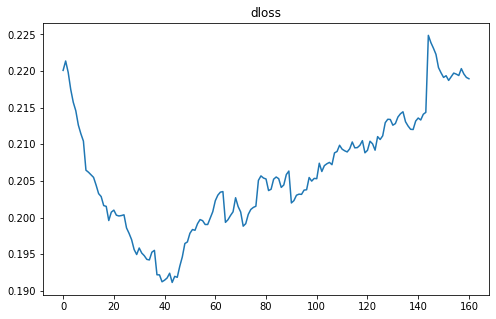

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("dloss")

# Noise 1

In [63]:
with open("/Users/michelle/Downloads/loss_log_noise_1.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]

In [64]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs:
    number, log = item.split(") ")
    log = log.split(" ")
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    



Text(0.5, 1.0, 'Generator loss')

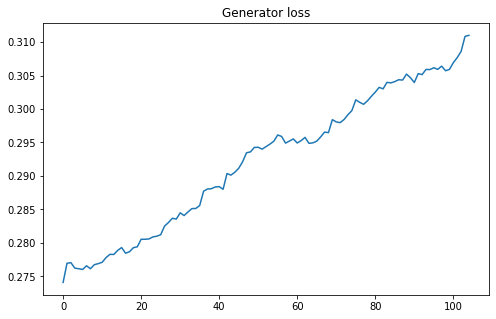

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'dloss')

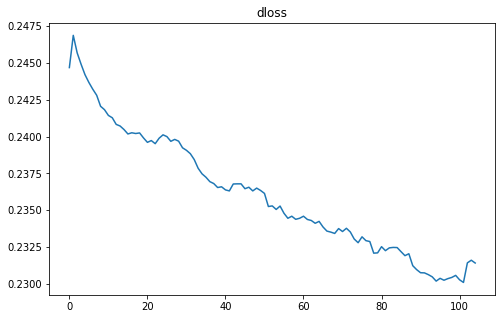

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("dloss")

# VGG

In [68]:
with open("/Users/michelle/Downloads/loss_log_vgg_2.txt", "r") as f:
    logs = f.read().split("\n")[:-1]

In [69]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    




Text(0.5, 1.0, 'Generator loss')

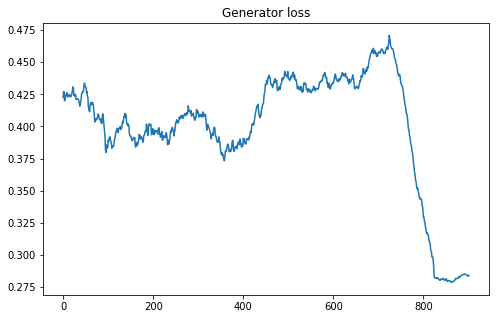

In [74]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

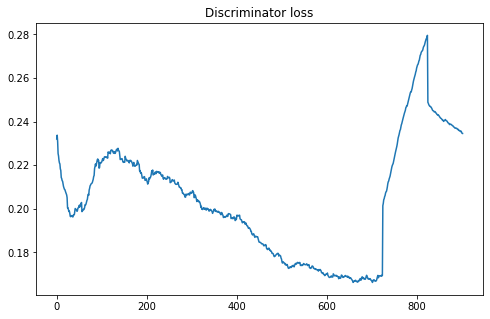

In [75]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("Discriminator loss")

In [76]:
with open("/Users/michelle/Downloads/loss_log_vgg.txt", "r") as f:
    logs = f.read().split("\n")[:-1]

In [77]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    





Text(0.5, 1.0, 'Generator loss')

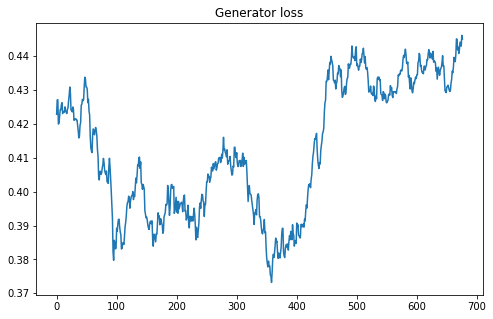

In [78]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

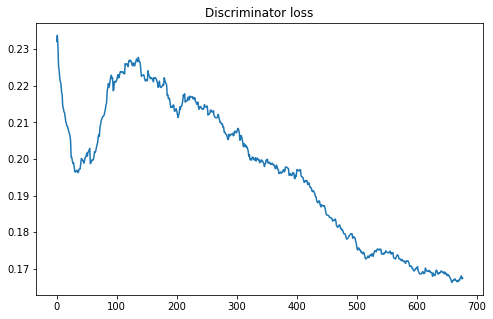

In [79]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("Discriminator loss")

In [82]:
with open("/Users/michelle/Downloads/loss_log_vgg_2.txt", "r") as f:
    logs = f.read().split("\n")[3:-1]

In [84]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}
k = False
for item in logs:
    number, log = item.split(") ")
    log = log.split(" ")
    if not k:
        if "=======" in item:
            k = True
        continue
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    






Text(0.5, 1.0, 'Generator loss')

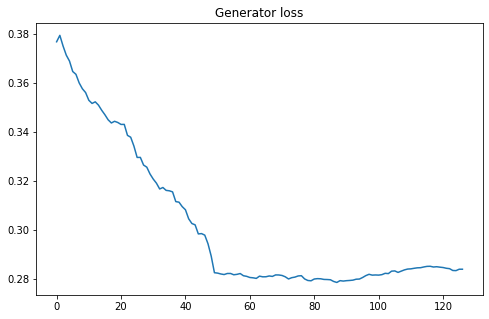

In [85]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

# VGG 250

In [86]:
with open("/Users/michelle/Downloads/loss_log_wgg_250.txt", "r") as f:
    logs = f.read().split("\n")[:-1]

In [91]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    





Text(0.5, 1.0, 'Generator loss')

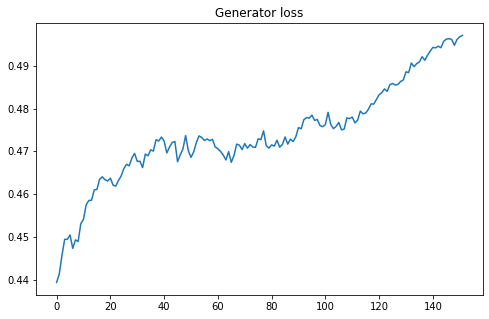

In [92]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

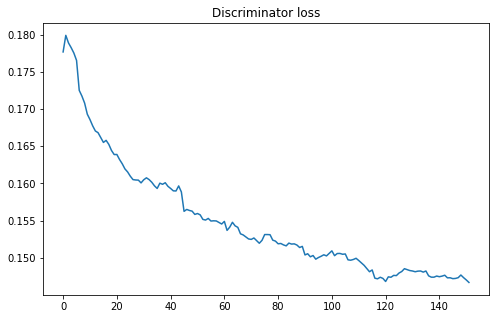

In [94]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("Discriminator loss")

In [97]:
5 ** 10

9765625

# VGG new arch 200

In [2]:
with open("/Users/michelle/Downloads/loss_log_vgg_full.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]

In [3]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    

Text(0.5, 1.0, 'Generator loss')

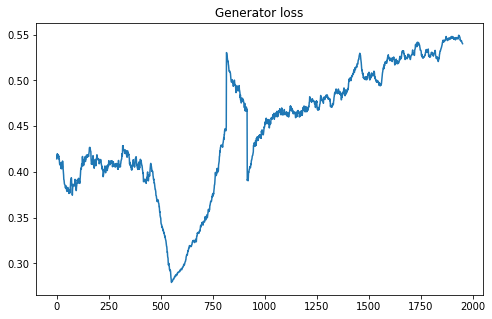

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

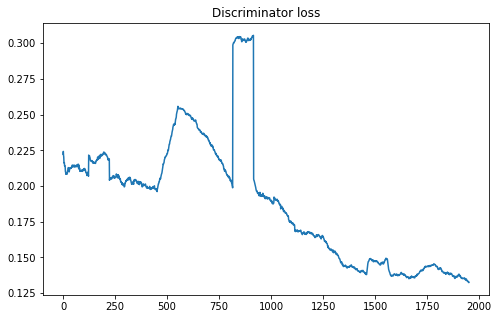

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("Discriminator loss")

In [10]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs[:750]:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    

Text(0.5, 1.0, 'Generator loss')

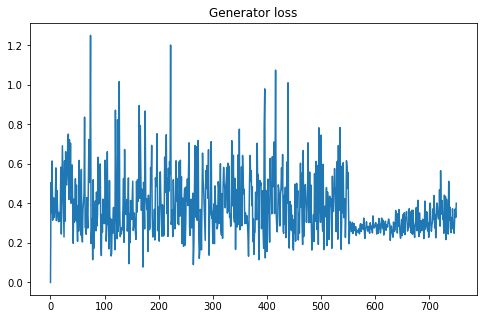

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"], 1))
plt.title("Generator loss")

In [15]:
logs[570]

'(epoch: 58, iters: 300, time: 0.083, data: 0.272) D_A: 0.249 G_A: 0.246 cycle_A: 0.820 idt_A: 0.108 D_B: 0.214 G_B: 0.327 cycle_B: 0.687 idt_B: 0.114 '

In [16]:
with open("/Users/michelle/Downloads/loss_log_z.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]

In [17]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs[:750]:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    

Text(0.5, 1.0, 'Generator loss')

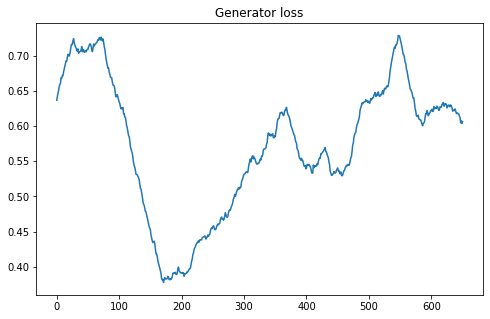

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

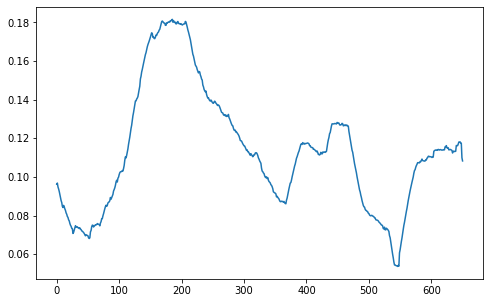

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))

In [20]:
logs[200]

'(epoch: 20, iters: 3000, time: 0.151, data: 0.008) D_A: 0.153 G_A: 0.372 cycle_A: 0.986 idt_A: 0.077 D_B: 0.104 G_B: 0.472 cycle_B: 1.313 idt_B: 0.072 '

In [47]:
with open("/Users/michelle/Downloads/loss_log_noise.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]

In [48]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs[:750]:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
#     new_epoch = int(number.split(" ")[1][:-1])
#     if new_epoch > epoch:
#         epoch_counter = data["iter"][-1] if data["iter"] else 0
#         epoch = new_epoch
#         for loss in data:
#             data[loss][-1] /= iters
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))
    
#         epoch = new_epoch
        
#     else:
#         data["D_A"][-1] += float(log[1])
#         data["G_A"][-1] += float(log[3])
#         data["cycle_A"][-1] += float(log[5])
#         data["idt_A"][-1] += float(log[7])
#         data["D_B"][-1] += float(log[9])
#         data["G_B"][-1] += float(log[11])
#         data["cycle_B"][-1] += float(log[13])
#         data["idt_B"][-1] += float(log[15])    

Text(0.5, 1.0, 'Generator loss')

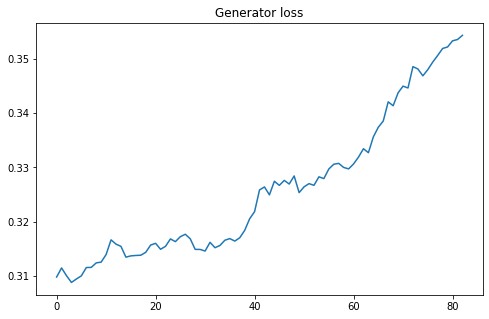

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

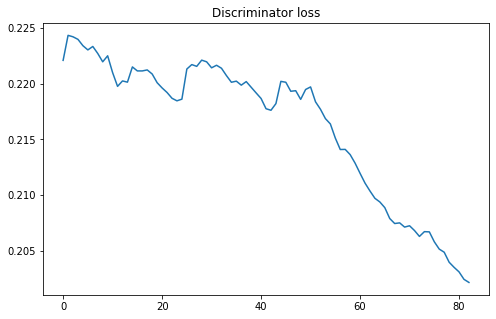

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("Discriminator loss")

In [26]:
with open("/Users/michelle/Downloads/loss_log_noise_1.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]

In [27]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs[:750]:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))  

Text(0.5, 1.0, 'Generator loss')

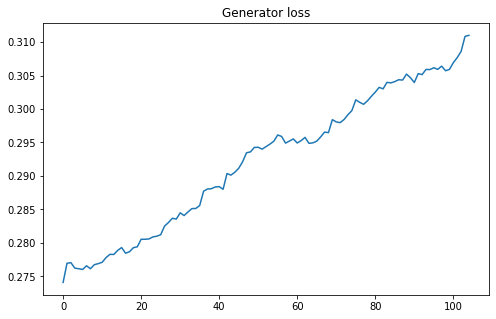

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

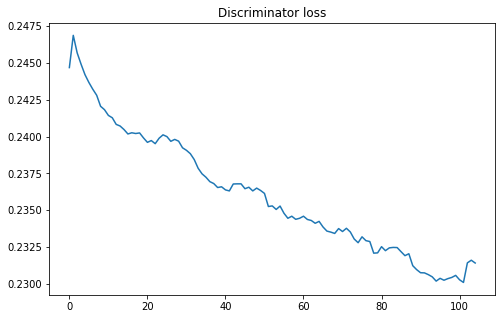

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"]))
plt.title("Discriminator loss")

In [31]:
with open("/Users/michelle/Downloads/loss_log_base.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]

In [32]:
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs[:750]:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))  

Text(0.5, 1.0, 'Generator loss')

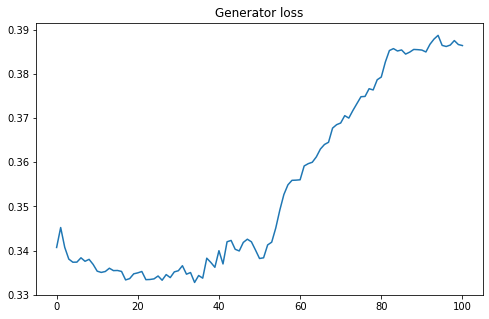

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"][:200]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

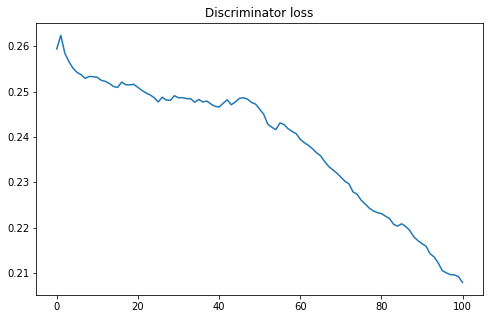

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"][:200]))
plt.title("Discriminator loss")

In [51]:
with open("/Users/michelle/Downloads/loss_log_vgg_old_155.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]

In [52]:
with open("/Users/michelle/Downloads/loss_log_vgg_old_155.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs[:750]:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))  

Text(0.5, 1.0, 'Generator loss')

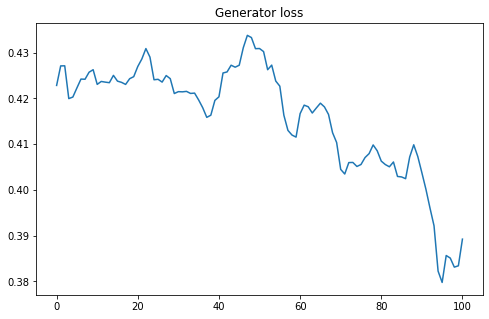

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"][:200]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

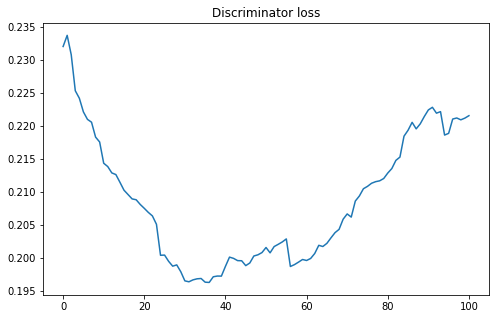

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"][:200]))
plt.title("Discriminator loss")

In [57]:
with open("/Users/michelle/Downloads/200_net 2/loss_log.txt", "r") as f:
    logs = f.read().split("\n")[1:-1]
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs[:750]:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))  

Text(0.5, 1.0, 'Generator loss')

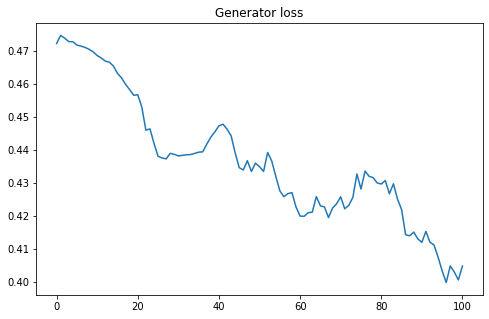

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["G_A"][:200]))
plt.title("Generator loss")

Text(0.5, 1.0, 'Discriminator loss')

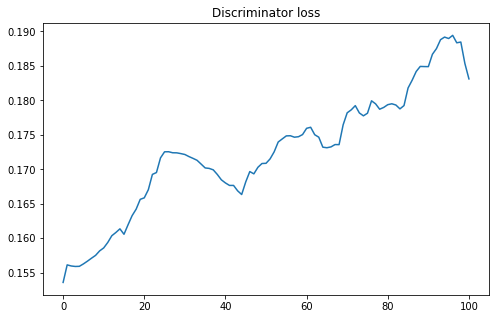

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(moving_average(data["D_A"][:200]))
plt.title("Discriminator loss")

In [ ]:
with open("/Users/michelle/Downloads/lo", "r") as f:
    logs = f.read().split("\n")[1:-1]
data = {"D_A": [0], "G_A": [0], "cycle_A": [0], "idt_A": [0], "D_B": [0], "G_B": [0], "cycle_B": [0], "idt_B": [0]}

for item in logs[:750]:
    number, log = item.split(") ")
    log = log.split(" ")
    if "=======" in item:
        continue
        
    data["D_A"].append(float(log[1]))
    data["G_A"].append(float(log[3]))
    data["cycle_A"].append(float(log[5]))
    data["idt_A"].append(float(log[7]))
    data["D_B"].append(float(log[9]))
    data["G_B"].append(float(log[11]))
    data["cycle_B"].append(float(log[13]))
    data["idt_B"].append(float(log[15]))  